In [61]:
from nd2reader import ND2Reader
import numpy as np
import matplotlib.pyplot as plt

In [66]:
nd2_image = ND2Reader('/home/richard/Documents/Large_mvt_1.nd2')
nd2_image.metadata

{'height': 4534,
 'width': 4618,
 'date': datetime.datetime(2022, 3, 10, 13, 27, 34),
 'fields_of_view': [0],
 'frames': range(0, 8),
 'z_levels': [],
 'z_coordinates': [4194.4800000000005,
  4234.82,
  4237.5,
  4233.88,
  4230.78,
  4228.22,
  4226.9800000000005,
  4223.04],
 'total_images_per_channel': 8,
 'channels': ['DAPI', 'FITC', 'TRITC', 'Cy5', 'BF'],
 'pixel_microns': 1.291471326296314,
 'num_frames': 8,
 'experiment': {'description': '',
  'loops': [{'start': 0,
    'duration': 0,
    'stimulation': False,
    'sampling_interval': 0.0}]},
 'events': []}

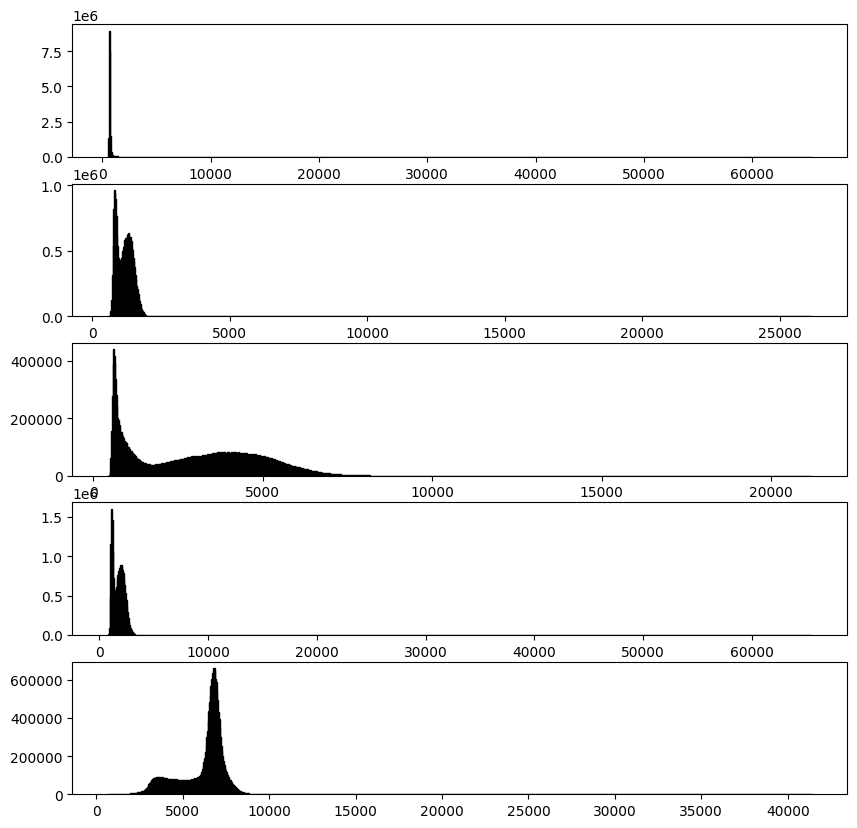

In [72]:
plt.rcParams["figure.figsize"] = (10,10)

fig, axs = plt.subplots(5, 1)

for i in range(5):
    
    frame = nd2_image.get_frame_2D(t=0,c=i)
    
    axs[i].hist(frame.ravel(),bins=1000, fc='k', ec='k')

Low contrast, when just doing imshow as is. Need to manually set boundaries with vmin and vmax.

Analyze evolution over time. First channel: 

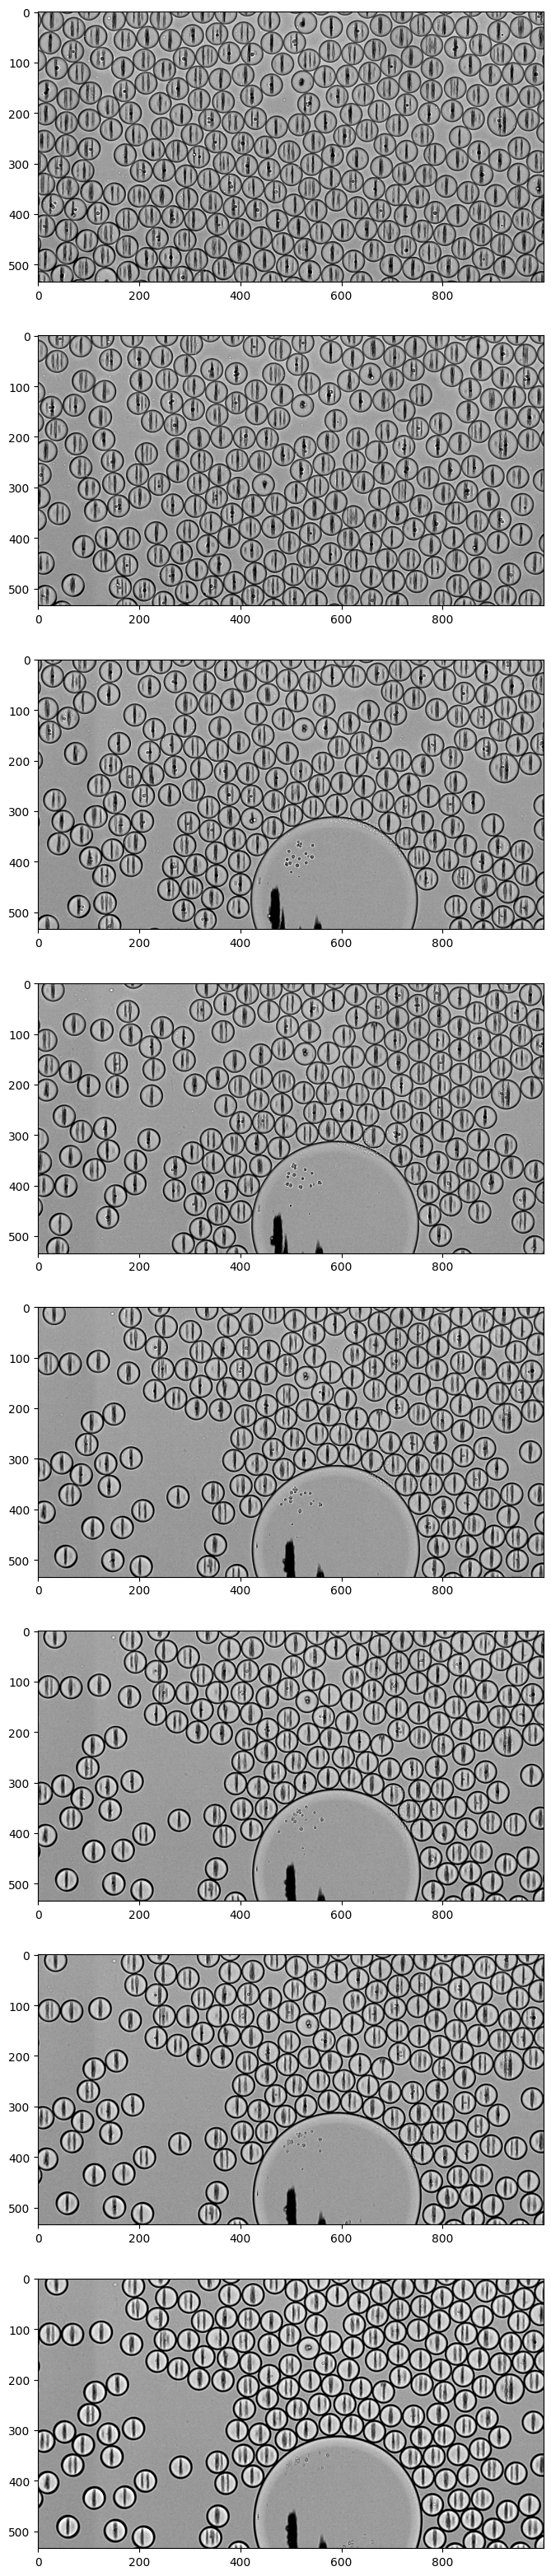

In [73]:
plt.rcParams["figure.figsize"] = (40,40)

fig, axs = plt.subplots(8, 1)

for i in range(8):
    
    frame = nd2_image.get_frame_2D(t=i,c=4)
    frame = frame[4000:,1000:2000]
    
    # channel c=1: vmin=800, vmax=1800
    # channel c=4: vmin=2500, vmax=9000
    
    axs[i].imshow(frame, cmap='gray', vmin=2500, vmax=9000)